In [10]:
# extract information from dump file.
import numpy as num
import matplotlib.pyplot as plt
from matplotlib import use
import pylab as lab
from scipy import constants
from matplotlib import rcParams
import os
import pandas as pan

from scipy.optimize import curve_fit

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/function")

import FDEAM as feam

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/")



#setting different parameteres
params = {
    'font.family':'serif',
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
    'axes.labelpad' : 0,
   'text.usetex': False,
   'figure.figsize': [4,4],
    'figure.max_open_warning': 0
   }
rcParams.update(params)
%matplotlib inline




In [16]:
frames=100
rawData=feam.DumpExtractorIncomplete("../FDEAMCrystalCalculations/PtSlab.dump",100,2160,0)
[vxs,vys,vzs]=rawData["velocity"]
[xs,ys,zs]=rawData["position"]
[cs,ws]=rawData["chargeQV"]
[exs,eys,ezs]=rawData["electricField"]
[layerss,ass]=feam.Layers(zs,2160)
completed=rawData["CFrame"]
print(completed)
begin=0

eavz18=[]
eavx18=[]
eavy18=[]
chav18=[]
zav18=[]
for counter in range(len(ass)):
    eavz18.append(num.sum(num.sum(ezs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    chav18.append(num.sum(num.sum(cs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavx18.append(num.sum(num.sum(exs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavy18.append(num.sum(num.sum(eys[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    zav18.append(num.sum(num.sum(zs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))        
 
number = 0
for var in layerss[3:-3]: number += var[0].size
delta_z = zav18[-3]-zav18[3]
print(delta_z)

100
27.170602041853336


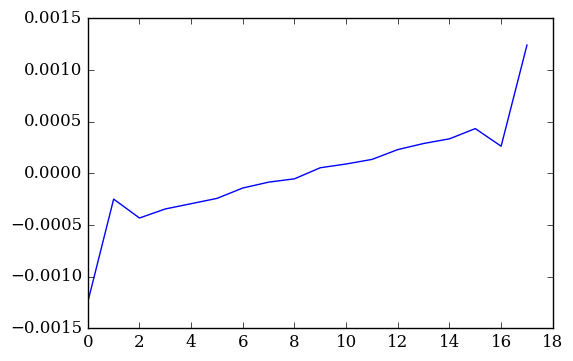

In [17]:
"""



lab.plot(eavz18,'o-')
lab.show()
#num.savetxt("/home/hbhattar/Desktop/CuPt.dat",cs[0])
#len(ass)
print(ass)
file=open("/home/hbhattar/PERSONAL/FDEAM_PAPER/plots/screen.dat","w")
fileCharge=open("/home/hbhattar/PERSONAL/FDEAM_PAPER/plots/charge.dat","w")
fileDensity=open("/home/hbhattar/PERSONAL/FDEAM_PAPER/plots/density.dat","w")

file.write("# z\t E_z\n")
fileCharge.write("#Z\t q\n")
fileDensity.write("#z\tP\n")
area=28.805*27.7185
for count in range(1,len(ass)+1):
    file.write("%f\t%f\n"%(count,eavz18[count-1]))
    fileCharge.write("%f\t%f\n"%(count,chav18[count-1]))
    try:
        fileDensity.write("%f\t%e\n"%((count+0.5),(-chav18[count-1]+chav18[count])))
    except:
        print("%d No data in denstiy"%(count))
file.close()
fileCharge.close()
fileDensity.close()



"""
plt.plot(chav18)

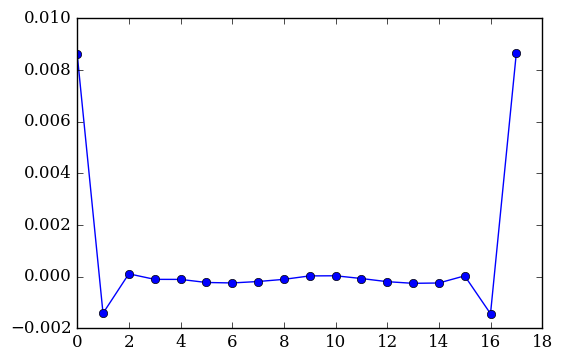

18 No data in denstiy


In [4]:
lab.plot(eavz18,'o-')
lab.show()
density=[]
area=28.805*27.7185
for count in range(1,len(ass)+1):
    try:
        density.append(-chav18[count-1]+chav18[count])
    except:
        print("%d No data in denstiy"%(count))

In [5]:
def density(name,Efield,nMol):
    
    frames=100
    rawData=feam.DumpExtractorIncomplete("../FDEAMCrystalCalculations/SlabInField/%sSlabWithSO_6E_%s.dump"%(name,Efield),100,nMol,0)
    [vxs,vys,vzs]=rawData["velocity"]
    [xs,ys,zs]=rawData["position"]
    [cs,ws]=rawData["chargeQV"]
    [exs,eys,ezs]=rawData["electricField"]
    [layerss,ass]=feam.Layers(zs,nMol)
    completed=rawData["CFrame"]
    begin=0

    eavz18=[]
    eavx18=[]
    eavy18=[]
    chav18=[]
    zav18=[]
    for counter in range(len(ass)):
        eavz18.append(num.sum(num.sum(ezs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
        chav18.append(num.sum(num.sum(cs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
        eavx18.append(num.sum(num.sum(exs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
        eavy18.append(num.sum(num.sum(eys[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
        zav18.append(num.sum(num.sum(zs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))   
    
    number = 0
    for var in layerss[3:-3]: number += var[0].size
    
    delta_z = zav18[-3]-zav18[3]
    electron_charge = 1.60217662e-19
    
    density=[]
    for count in range(1,len(ass)+1):
        try:
            density.append(-chav18[count-1]+chav18[count])
        except:
            #print("%d No data in denstiy"%(count))
            ppp = 1
        
    #lab.plot(density)
    #lab.show()
    den_inside = density[3:-3]
    den_average = sum(den_inside)/len(den_inside) * electron_charge/ (2 * area[name] * 8.854e-22)
    ez_average = sum(eavz18)/len(eavz18)
    atomic_dipole = ( den_average * electron_charge * delta_z )/( 2*number ) 
    return den_average, atomic_dipole, ez_average
    
 
    

In [6]:
nMol = {
    "Ag": 1536,
    "Al": 1536,
    "Au": 1536,
    "Co": 2000,
    "Cu": 1536,
    "Fe": 768,
    "Mg": 2000,
    "Mo": 1200,
    "Ni": 1536,
    "Pb": 1536,
    "Pd": 1536,
    "Pt": 2160,
    "Ta": 768,
    "Ti": 2000,
    "W":  1568,
    "Zr": 2000,
    
}
#experimental: Ag, Al, Cu, Mg, Mo, Pb, Zr, Ti
#conversion factor to A^3 1au = 0.14818474 A^3
polarizablity={
    "Ag": 45.9,
    "Al": 46.2,
    "Au": 36.1, 
    "Co": 57.71,
    "Cu": 58.7,
    "Fe": 63.93,
    "Mg": 59,
    "Mo": 87.1,
    "Ni": 51.10,
    "Pb": 56,
    "Pd": 32,
    "Pt": 44,
    "Ta": 58.0,
    "Ti": 63.4,
    "W":  75,
    "Zr": 112,
}

area={
    "Ag": 40.027602 * 23.109947,
    "Al": 39.676835 * 22.907431, 
    "Au": 39.958036 * 23.069783, 
    "Co": 21.71472 * 25.074,
    "Cu": 35.418642 * 20.448962,
    "Fe": 28.085849 * 16.215373,
    "Mg": 27.797 * 32.097,
    "Mo": 30.765591 * 22.203153,
    "Ni": 34.528007 * 19.934754,
    "Pb": 48.507735 * 28.005954,
    "Pd": 38.120919 * 22.009123,
    "Pt": 28.805999 * 22.174869,
    "Ta": 32.346002 * 18.674973,
    "Ti": 25.161 * 29.054,
    "W":  25.321600 * 31.333881,
    "Zr": 27.993 * 32.323,
}

In [7]:
def alpha(name):
    field=[0.01,0.06,0.12,0.17,0.23,0.28,0.34,0.39,0.44,0.5]
    dipole_density=[]
    dipole = []
    ez_field = []
    for value in field:
        dd,d,e = density(name,str(value),nMol[name])
        dipole_density.append(dd)
        ez_field.append(e)
        dipole.append(d)
    
    
    
    lab.plot(ez_field,dipole,'o-')
    lab.show()
    from scipy.optimize import curve_fit

    f =lambda x,a,b:a*x+b
    param,cov_matrix = curve_fit(f,ez_field,dipole)
    slope = param[0]
    alpha = slope / 1.1126e-20
    print(name+" : ",alpha)
    return alpha
    
    
    

Cu


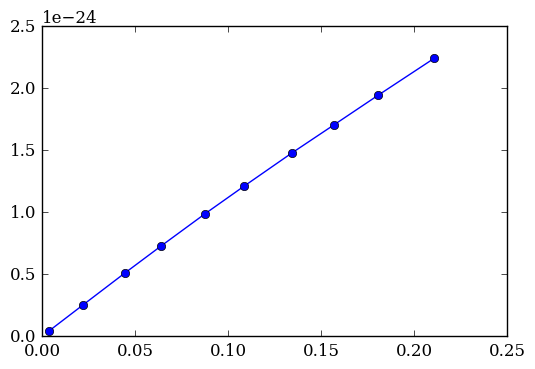

Cu :  0.0009544087605047941
Ag


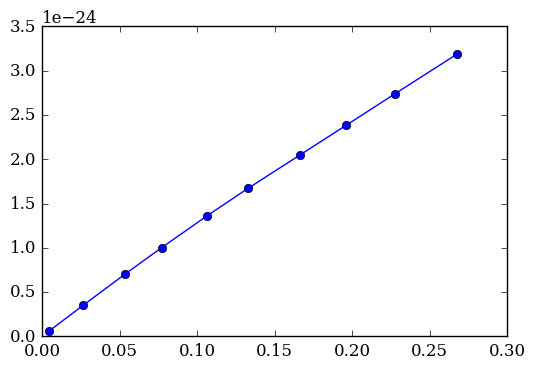

Ag :  0.0010632448060861766
Au


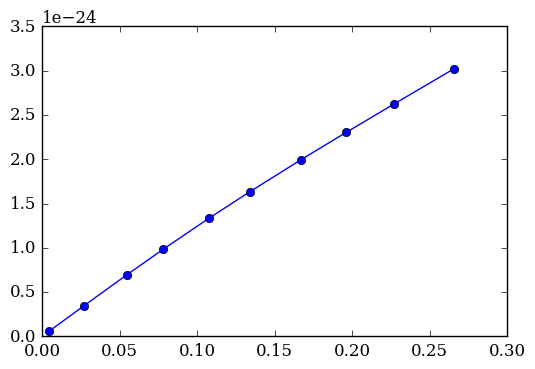

Au :  0.001018839338134388
Ni


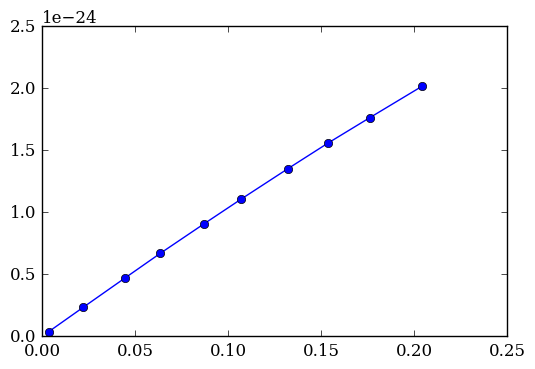

Ni :  0.0008891463596817793
Pd


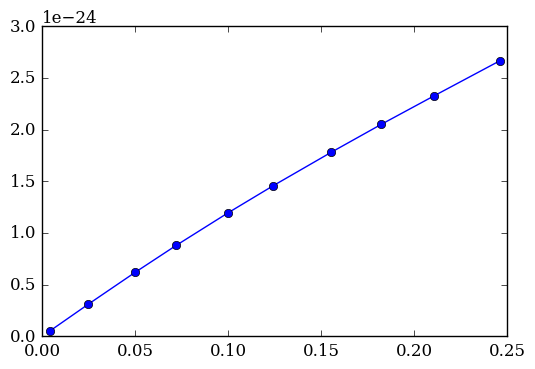

Pd :  0.0009700475688302469
Al
Error: Incomplete file


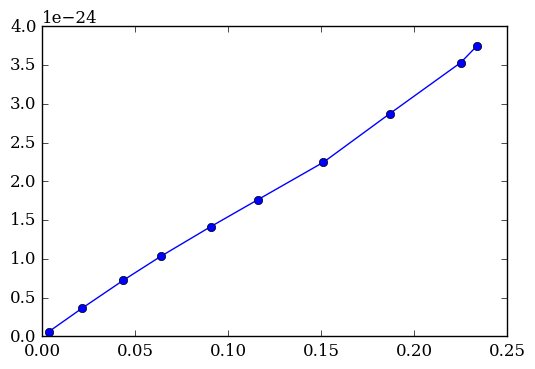

Al :  0.001400795922728292
Pb
Error: Incomplete file
Error: Incomplete file


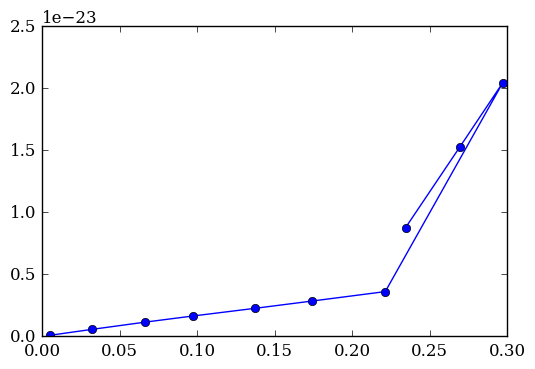

Pb :  0.005211810323940826
Fe


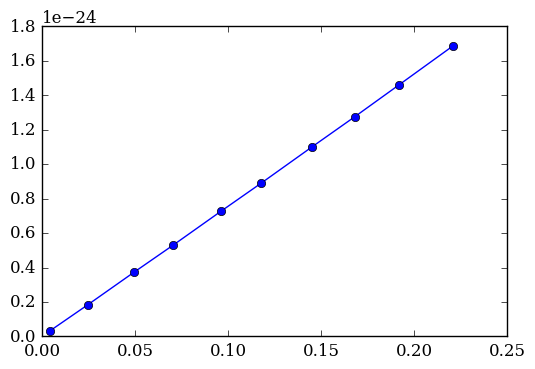

Fe :  0.0006858917981443623
Mo


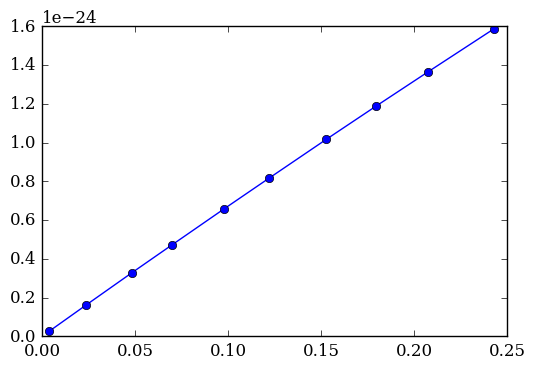

Mo :  0.0005872778247656855
Ta


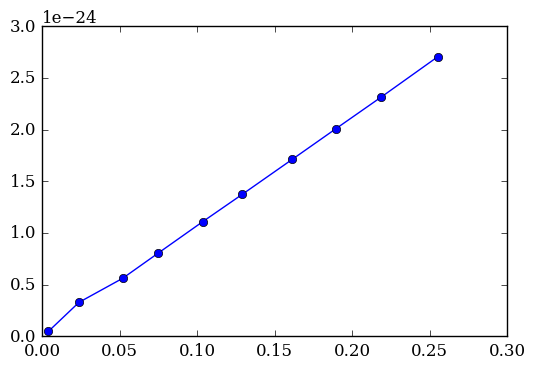

Ta :  0.0009391073717074428
W


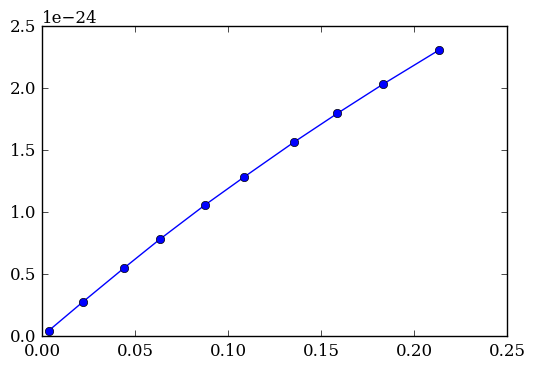

W :  0.0009706705599135514


In [8]:
ele_name = ['Cu', 'Ag', 'Au', 'Ni', 'Pd', 'Al', 'Pb', 'Fe', 'Mo', 'Ta', 'W']
pol_exp = []
pol_cal = []
for names in ele_name:
    print(names)
    pol_cal.append(alpha(names))
    pol_exp.append(polarizablity[names])

In [ ]:
lab.plot(pol_cal,'o')
plt.xticks(num.arange(len(ele_name)), ele_name)
lab.show()
lab.plot(num.array(pol_exp) *0.14818,'*')
plt.xticks(num.arange(len(ele_name)), ele_name)
lab.show()

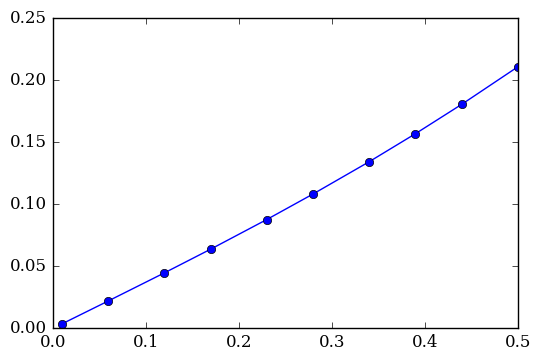

In [53]:
def E_applied_Vs_E_local(name):
    field=[0.01,0.06,0.12,0.17,0.23,0.28,0.34,0.39,0.44,0.5]
    dipole_density=[]
    dipole = []
    ez_field = []
    for value in field:
        dd,d,e = density(name,str(value),nMol[name])
        dipole_density.append(dd)
        ez_field.append(e)
        dipole.append(d)
    
    
    
    lab.plot(field,ez_field,'o-')
    lab.show()
E_applied_Vs_E_local("Cu")  

0.000842158843671163


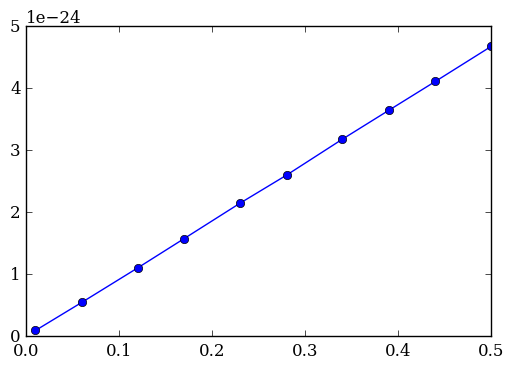

In [128]:
lab.plot(field,dipole_density,'o-')
from scipy.optimize import curve_fit

f =lambda x,a,b:a*x+b
param,cov_matrix = curve_fit(f,field,dipole_density)
slope = param[0]
polarizablity = slope / 1.1126e-20
print(polarizablity)

In [71]:
from

In [60]:
a1,b1,c1,d1=16.28,9.53489,16.0558,10.3539

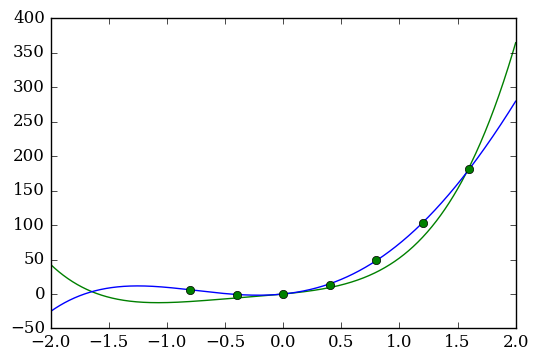

In [73]:
x=num.linspace(-2,2,1000)
lab.plot(x,f(x,a1,b1,c1,d1),'g')
lab.plot(x,f(x,a2,b2,c2,d2))
lab.plot(xdata,ydata,'o')

In [562]:
nMol=1536
Pt=-204373.10
Cu=-125389.72
PtCu=-204340.97
CuPt=-125449.83

conv=0.043364

PtC=Pt*conv/nMol
print(PtC)

CuC=Cu*conv/nMol
print(CuC)

PtCuVac=PtCu*conv-(nMol-1)*PtC-CuC
print(PtCuVac)

CuPtVac=CuPt*conv-(nMol-1)*CuC-PtC
print(CuPtVac)

-5.769814523697917
-3.539973839895833
-0.8365553638010854
-0.3767693561988352


In [76]:
a[1]

2

In [319]:
names = ["Pt","Cu","Ag","Al","Au", "Fe", "Mo", "Ni", "Pb", "Pd", "Ta"]
print(enumerate(names))

In [320]:
for var in enumerate(names):
    print(var)

(0, 'Pt')
(1, 'Cu')
(2, 'Ag')
(3, 'Al')
(4, 'Au')
(5, 'Fe')
(6, 'Mo')
(7, 'Ni')
(8, 'Pb')
(9, 'Pd')
(10, 'Ta')


In [326]:
num.zeros(10).reshape(5,2)

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [329]:
a=2.001
a

2.001

In [335]:
b="{:+.2f}".format(a)

In [336]:
b

'+2.00'

In [565]:
l=[1,2,'ram']

In [566]:
num.array(l)

array(['1', '2', 'ram'], 
      dtype='<U21')

In [569]:
s=open("/home/hbhattar/groupspace/amazanek/output.output")

In [574]:
lines=s.readlines()

In [576]:
line=lines[1:]

In [589]:
names = ["Pt","Cu","Ag","Al","Au", "Fe", "Mo", "Ni", "Pb", "Pd", "Ta"]
nMol={
    "Ag":1536,
    "Al":1536,
    "Au":1536,
    "Cu":1536,
    "Fe":768,
    "Mo":768,
    "Ni":1536,
    "Pb":1536,
    "Pd":1536,
    "Pt":1536,
    "Ta":768
}
dictOfNames={"Pt":0,"Cu":1,"Ag":2,"Al":3,"Au":4, "Fe":5, "Mo":6, "Ni":7, "Pb":8, "Pd":9, "Ta":10}
hostImp =[[hos,imp] for hos in names for imp in names]

his=[] #[(host,impurity,energy)]
for pair in hostImp:
    host=pair[0]
    impurity=pair[1]
    if (host!=impurity):
        file=host+impurity+".eor"
        rawData=feam.DumpExtractorIncomplete("../FDEAMCrystalCalculations/"+file,1,nMol[host],0)
        [cs,ws]=rawData["chargeQV"]
        print("Host: %s Impurity: %s Heat: %f\n"%(host,impurity,cs[0][-1]))
        his.append([dictOfNames[host],dictOfNames[impurity],cs[0][-1]])
    else:
        his.append([dictOfNames[host],dictOfNames[impurity],9999])
dataArray=num.zeros(len(names)*len(names)).reshape(len(names),len(names))
for data in his:
    dataArray[data[1],data[0]]="{:+.3f}".format(data[2])

dataFrame=pan.DataFrame(dataArray)
dataFrame.to_csv("../FDEAMCrystalCalculations/HIC.csv",sep=",",header=names , index=names)


Host: Pt Impurity: Cu Heat: 0.247955

Host: Pt Impurity: Ag Heat: 0.350896

Host: Pt Impurity: Al Heat: 0.482725

Host: Pt Impurity: Au Heat: -0.149468

Host: Pt Impurity: Fe Heat: 0.258201

Host: Pt Impurity: Mo Heat: 0.311986

Host: Pt Impurity: Ni Heat: 0.312289

Host: Pt Impurity: Pb Heat: 0.393826

Host: Pt Impurity: Pd Heat: 0.251628

Host: Pt Impurity: Ta Heat: 0.347989

Host: Cu Impurity: Pt Heat: -0.264438

Host: Cu Impurity: Ag Heat: 0.204635

Host: Cu Impurity: Al Heat: -0.220252

Host: Cu Impurity: Au Heat: -0.199402

Host: Cu Impurity: Fe Heat: -0.193529

Host: Cu Impurity: Mo Heat: 0.111516

Host: Cu Impurity: Ni Heat: -0.142343

Host: Cu Impurity: Pb Heat: -0.132935

Host: Cu Impurity: Pd Heat: -0.195335

Host: Cu Impurity: Ta Heat: -0.147938

Host: Ag Impurity: Pt Heat: -0.196353

Host: Ag Impurity: Cu Heat: -0.147861

Host: Ag Impurity: Al Heat: -0.368486

Host: Ag Impurity: Au Heat: -0.217204

Host: Ag Impurity: Fe Heat: -0.152700

Host: Ag Impurity: Mo Heat: -0.06669

In [125]:
frames=100

nMol=1372

rawData=feam.DumpExtractorIncomplete("../L10/PtFeL10.eor",1,nMol,0)
[vxs,vys,vzs]=rawData["velocity"]
[xs,ys,zs]=rawData["position"]
[cs,ws]=rawData["chargeQV"]
[exs,eys,ezs]=rawData["electricField"]
[layerss,ass]=feam.Layers(zs,nMol)
ds=rawData["density"]
completed=rawData["CFrame"]
print(completed)
begin=75

eavz18s=[]
eavx18s=[]
eavy18s=[]
chav18s=[]
zav18s=[]
for counter in range(len(ass)):
    eavz18s.append(num.sum(num.sum(ezs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    chav18s.append(num.sum(num.sum(cs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavx18s.append(num.sum(num.sum(exs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavy18s.append(num.sum(num.sum(eys[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    zav18s.append(num.sum(num.sum(zs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))        
 

1


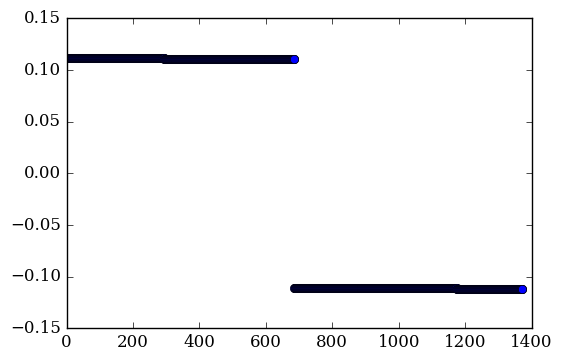

In [126]:
lab.plot(cs[0],'o')
lab.show()

In [104]:
frames=100

nMol=1372

rawData=feam.DumpExtractorIncomplete("../L10/AgCuL10Zhou.eor",1,nMol,0)
[vx,vy,vz]=rawData["velocity"]
[x,y,z]=rawData["position"]
[c,w]=rawData["chargeQV"]
[ex,ey,ez]=rawData["electricField"]
d=rawData["density"]
[layers,a]=feam.Layers(zs,nMol)
completed=rawData["CFrame"]
print(completed)
begin=75

eavz18=[]
eavx18=[]
eavy18=[]
chav18=[]
zav18=[]
for counter in range(len(a)):
    eavz18.append(num.sum(num.sum(ez[begin:,layers[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    chav18.append(num.sum(num.sum(c[begin:,layers[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavx18.append(num.sum(num.sum(ex[begin:,layers[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavy18.append(num.sum(num.sum(ey[begin:,layers[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    zav18.append(num.sum(num.sum(z[begin:,layers[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))        

1


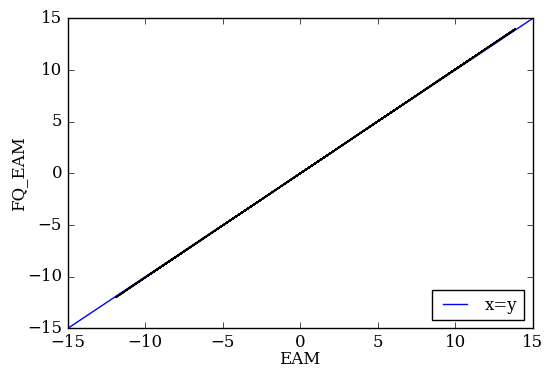

In [112]:
dat=num.linspace(-15,15,10)
datay=dat
#lab.plot(dat,datay,'-b')
#lab.plot(y[0],ys[0],'.r')
lab.plot(dat,datay,'b',label="x=y")
#lab.plot(x[0],xs[0],'.-g')
lab.plot(z[0],zs[0],'--k')
lab.xlabel("EAM")
lab.ylabel("FQ_EAM")
lab.legend(loc='lower right')
lab.show()

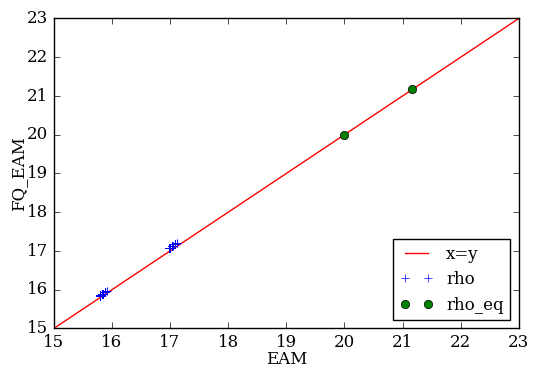

In [114]:
dat=num.linspace(15,23,10)
datay=dat
lab.plot(dat,datay,'-r',label='x=y')
lab.plot(d[0][0],ds[0][0],'+',label="rho")
lab.plot(21.17,21.17,'og',label="rho_eq")
lab.plot(19.99,19.99,'og')
lab.plot()
lab.xlabel("EAM")
lab.ylabel("FQ_EAM")
lab.legend(loc='lower right')
#lab.ylim([18.2,18.6])
#lab.xlim([18.2,18.6])
lab.show()

In [80]:
sum(num.logical_and((d[0][0]>18),(d[0][0]< 19)))

343

In [46]:
sum(num.logical_and((d[0][0]>21),(d[0][0]< 23)))

1029

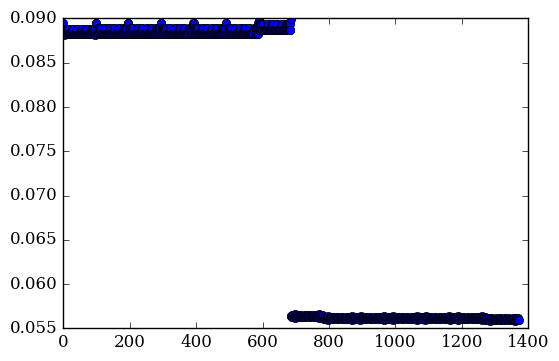

In [115]:
lab.plot(ds[0][0]-d[0][0],'o')
lab.show()

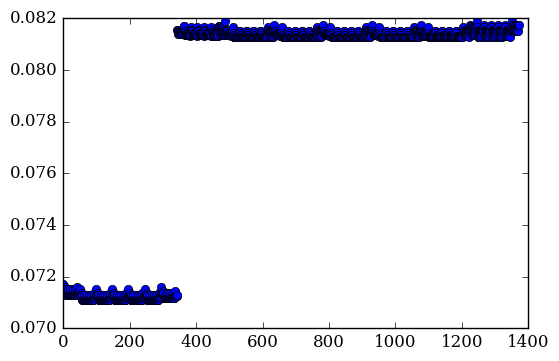

In [69]:
lab.plot(ds[0][0]-d[0][0],'o')
lab.show()

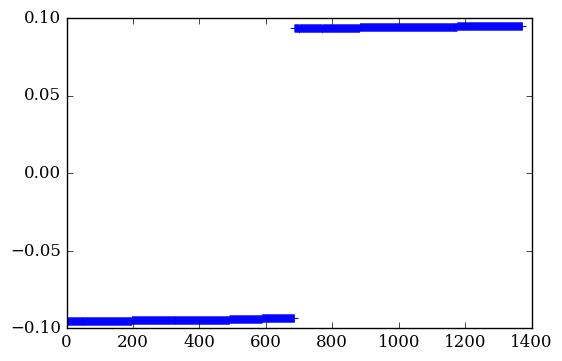

In [116]:
lab.plot(cs[0],'+')
lab.show()

In [26]:
frames=100

nMol={
    "Ag":1536,
    "Al":1536,
    "Au":1536,
    "Cu":1536,
    "Fe":768,
    "Mo":768,
    "Ni":1536,
    "Pb":1536,
    "Pd":1536,
    "Pt":1536,
    "Ta":768
}

rawData=feam.DumpExtractorIncomplete("../FDEAMCrystalCalculations/PtWithChlorine.eor",1,1153,0)
[vxs,vys,vzs]=rawData["velocity"]
[xs,ys,zs]=rawData["position"]
[cs,ws]=rawData["chargeQV"]
[exs,eys,ezs]=rawData["electricField"]
[layerss,ass]=feam.Layers(zs,2160)
completed=rawData["CFrame"]
print(completed)
begin=0

eavz18=[]
eavx18=[]
eavy18=[]
chav18=[]
zav18=[]
for counter in range(len(ass)):
    eavz18.append(num.sum(num.sum(ezs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    chav18.append(num.sum(num.sum(cs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavx18.append(num.sum(num.sum(exs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    eavy18.append(num.sum(num.sum(eys[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))
    zav18.append(num.sum(num.sum(zs[begin:,layerss[counter][0]],axis=1)/len(layerss[counter][0]))/(frames-begin))        
 

1


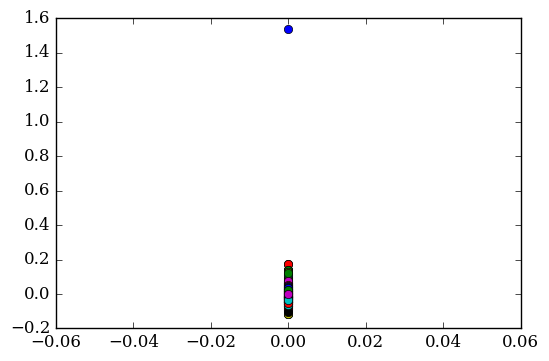

In [27]:
lab.plot(cs,'o')
lab.show()

In [25]:
num.sort(cs[0])[-8:]

array([ 0.02481496,  0.03674093,  0.03676563,  0.05851508,  0.05852211,
        0.09827117,  0.09827875,  0.1788726 ])

In [28]:
1/6

0.16666666666666666

In [19]:
frames=100
rawData=feam.DumpExtractorIncomplete("../FDEAMCrystalCalculations/PtSlab.dump",100,2160,0)
[vxs,vys,vzs]=rawData["velocity"]
[xs,ys,zs]=rawData["position"]
[cs,ws]=rawData["chargeQV"]
[exs,eys,ezs]=rawData["electricField"]
[layerss,ass]=feam.Layers(zs,2160)
completed=rawData["CFrame"]
print(completed)



100


In [32]:
xs,ys,zs,cs = sum(xs)/100,sum(ys)/100,sum(zs)/100,sum(cs)/100

In [38]:
filexyz = open("../FDEAMCrystalCalculations/charge.xyz",'w')
for pos in range(len(xs)):
    filexyz.write("Pt\t%f\t%f\t%f\t%f\n"%(xs[pos],ys[pos],zs[pos],cs[pos]))
filexyz.close()

In [43]:
file_eor = open("../FDEAMCrystalCalculations/charge_average.eor",'w')
file_eor.write("""<OpenMD version=2>
  <MetaData>

molecule{
  name = "Pt_FQ";

  atom[0]{
    type="Pt_FQ";
    position( 0.0, 0.0, 0.0 );
  }
}

component{
  type = "Pt_FQ";
  nMol = 2160;
}
minimizer {
useMinimizer = False;
                method = CG;
                  maxIterations = 5000;
                  }


      flucQ {
                  propagator = "Langevin";
                      targetTemp = 1;
                          dragCoefficient = 0.1;
                            }
      forceFieldFileName="EAM.Zhou2004.frc";
      forceField = "EAM";
      outputFluctuatingCharges = true;
      outputElectricField = true;
      outputDensity = true;
      ensemble = NVE;
      dt = 0.1;
      runTime = 1e4;
      sampleTime =100;
      statusTime = 10;

      cutoffMethod = "shifted_force";
      cutoffRadius = 13;
      electrostaticScreeningMethod = "DAMPED";
      statFileFormat = "TIME|TOTAL_ENERGY|POTENTIAL_ENERGY|KINETIC_ENERGY|TEMPERATURE|PRESSURE|VOLUME|CONSERVED_QUANTITY|SYSTEM_DIPOLE";
      dampingAlpha = 0.14;
      useSurfaceTerm = "true";
      targetTemp = 100;
      tauThermostat = 1000;
      tauBarostat = 1e6;
      uniformField = (0,0,1e-2);
      tempSet = "false";
      useInitialTime = "false";
      useInitialExtendedSystemState = "false";
      
      ## Last run using OpenMD version: 2.6, revision: 0e091ae735d8499f15722bc0709dd3d43fa99f07
  </MetaData>
  <Snapshot>
    <FrameData>
        Time: 10000
        Hmat: {{ 28.805999, 0, 0 }, { 0, 27.718586, 0 }, { 0, 0, 122.213505 }}
  Thermostat: 0 , 0
    Barostat: {{ 0, 0, 0 }, { 0, 0, 0 }, { 0, 0, 0 }}
    </FrameData>
    <StuntDoubles>
    ?""")
for pos in range(len(xs)):
    file_eor.write("%d\tpv\t%f\t%f\t%f\t%f\t%f\t%f\n"%(pos,xs[pos],ys[pos],zs[pos],0,0,0))
file_eor.write("</StuntDoubles>\n")
file_eor.write("<SiteData>\n")
for pos in range(len(xs)):
    file_eor.write("%d\tcw\t%f\t%f\n"%(pos,cs[pos],0))
file_eor.write("</SiteData>\n")
file_eor.write("</Snapshot>\n")
file_eor.write("</OpenMD>\n")
file_eor.close()

In [44]:
import time
print(time.time())

1550868254.3920083
